Le but de ce projet est d'étudier les conséquences de la présence d'hétéroscédasticité sur la fiabilité des tests de significativité des paramètres du modèle, et également d'apprécier la fiabilité de la correction de White. Par Romain DS.

## Import des modules et de la base de donnée.

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ATerracol/P8Econ/master/data/Projet2_Groupe10.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,y,x1,x2,x3,x4,x5
0,9.234541,-0.025673,1.093620,3.198434,1.313696,-0.743559
1,8.884024,0.922962,1.207828,0.247646,2.309810,1.549928
2,4.332616,1.118478,0.392701,2.268342,0.879499,1.355947
3,3.186548,2.622184,1.629872,-0.081164,-0.457415,2.370541
4,-0.911830,1.692084,1.450223,1.261972,0.036334,0.197359


## Régression par MCO de y sur x1, ... , x5.

In [4]:
X = df[['x1','x2','x3','x4','x5']]
X = sm.add_constant(X) # Je rajoute la constante beta 0.

y = df['y']

model = sm.OLS(y, X).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     40.28
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           9.70e-35
Time:                        21:08:42   Log-Likelihood:                -1324.5
No. Observations:                 500   AIC:                             2661.
Df Residuals:                     494   BIC:                             2686.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5453      0.361      1.511      0.131      -0.164       1.254
x1             0.9194      0.159      5.787      0.000       0.607       1.232
x2            -0.2128      0.160     -1.326      0.185      -0.528       0.102
x3             1.5728      0.157      9.989      0.000       1.263       1.882
x4             0.4931      0.152      3.237      0.001       0.194       0.792
x5             1.0543      0.152      6.922      0.000       0.755       1.353
==============================================================================
Omnibus:                       12.046   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.042
Skew:                          -0.208   Prob(JB):                     0.000199
Kurtosis:                       3.803   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test de Breusch-Pagan afin de savoir s'il y la présence d'hétéroscédasticité dans ce modèle.

In [11]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test[1]

5.600666280591141e-07

La p-value est de 5.600666280591141e-07, ce qui signifie qu'elle est inférieure au seuil de 5%. On rejette donc H0, il y a bien la présence d'hétéroscédasticité dans ce modèle. La variance des résidus n'est pas constante.

## Test de Breusch-Pagan variable par variable afin d'identifier la source de l'hétéroscédasticité.

In [14]:
for var in ['x1', 'x2', 'x3', 'x4', 'x5']:
    exo_var = sm.add_constant(df[[var]])
    test = het_breuschpagan(model.resid, exo_var)
    print(f'{var}, p-value : {test[1]}')

x1, p-value : 0.49870225365063947
x2, p-value : 0.0014691781618394704
x3, p-value : 5.519539439866352e-07
x4, p-value : 0.41703998772694806
x5, p-value : 0.2019128549399548


Nous pouvons voir que les variable x2 et x3 sont les causes de l'hétéroscédasticité.

## Graphique des résidus avec l'aide de matplotlib.

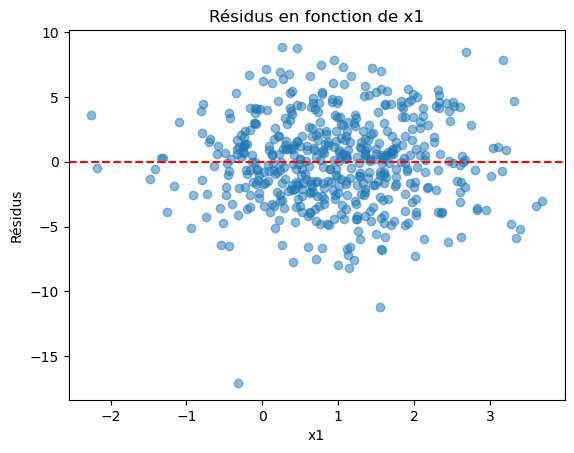

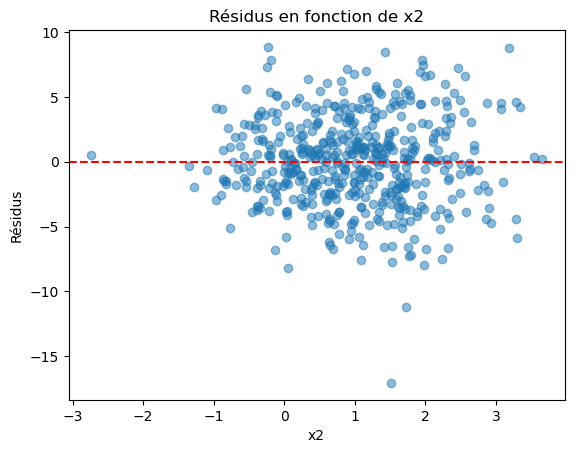

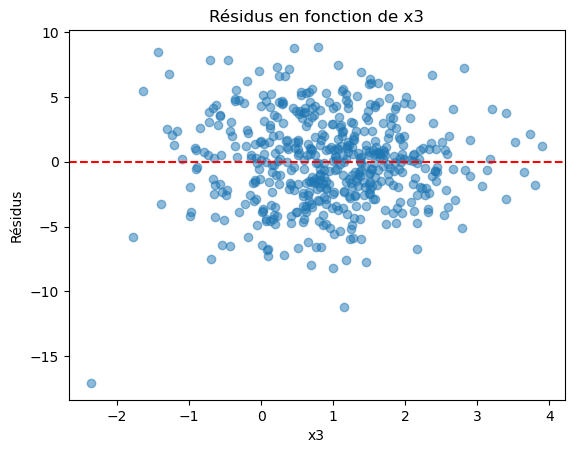

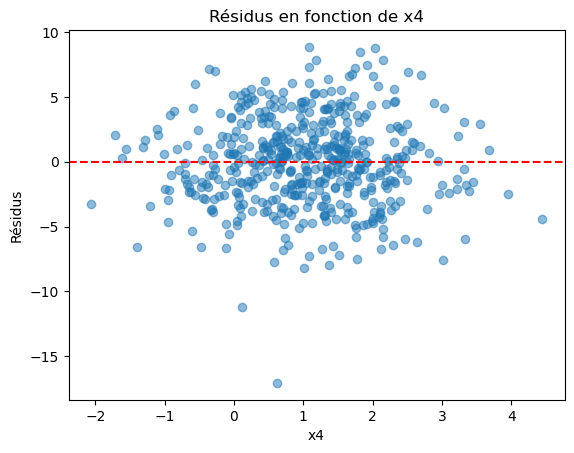

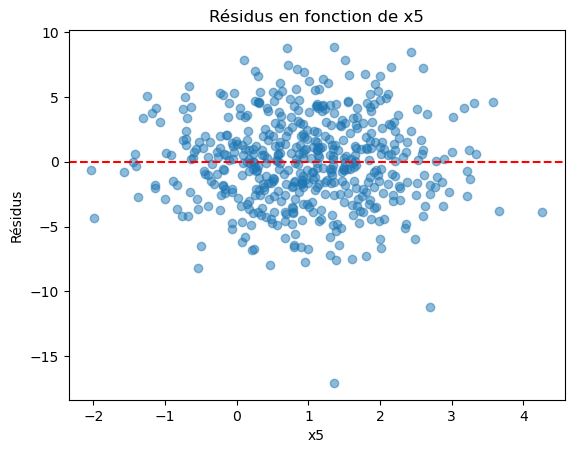

In [17]:
residuals = model.resid
variables = ['x1','x2','x3','x4','x5']

for var in variables:
    plt.scatter(df[var], residuals, alpha = 0.5)
    plt.axhline(0, color = 'red', linestyle = '--')
    plt.xlabel(var)
    plt.ylabel('Résidus')
    plt.title(f'Résidus en fonction de {var}')

    plt.show()

## Estimation robuste à l'hétéroscédasticité avec la correction WHITE (HC1).

In [21]:
model_robuste = model.get_robustcov_results(cov_type = 'HC1')
model_robuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     34.49
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.98e-30
Time:                        22:27:22   Log-Likelihood:                -1324.5
No. Observations:                 500   AIC:                             2661.
Df Residuals:                     494   BIC:                             2686.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5453      0.365      1.492      0.136      -0.173       1.263
x1             0.9194      0.158      5.805      0.000       0.608       1.231
x2            -0.2128      0.158     -1.345      0.179      -0.524       0.098
x3             1.5728      0.193      8.162      0.000       1.194       1.951
x4             0.4931      0.146      3.388      0.001       0.207       0.779
x5             1.0543      0.143      7.353      0.000       0.773       1.336
==============================================================================
Omnibus:                       12.046   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.042
Skew:                          -0.208   Prob(JB):                     0.000199
Kurtosis:                       3.803   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

## Implémentation des moindres carrés quasi-généralisés en créant les versions pondérées des variables explicatives.

In [25]:
variables_suspectes = ['x2','x3']
X_gls = sm.add_constant(df[variables_suspectes])

log_resid = np.log(model.resid**2)
alpha = sm.OLS(log_resid, X_gls).fit()

wi = 1 / np.exp(alpha.fittedvalues)

# WLS
model_gls = sm.WLS(y,X, weights= wi).fit()

# Résumé : 
model_gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            WLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     42.45
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.24e-36
Time:                        22:49:17   Log-Likelihood:                -1303.5
No. Observations:                 500   AIC:                             2619.
Df Residuals:                     494   BIC:                             2644.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6785      0.350      1.937      0.053      -0.010       1.367
x1             0.8039      0.147      5.480      0.000       0.516       1.092
x2            -0.1598      0.146     -1.096      0.274      -0.446       0.127
x3             1.5288      0.144     10.591      0.000       1.245       1.812
x4             0.5276      0.144      3.660      0.000       0.244       0.811
x5             0.9932      0.139      7.156      0.000       0.721       1.266
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.406
Skew:                          -0.001   Prob(JB):                        0.816
Kurtosis:                       2.860   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""